In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_row",15)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("C:/Users/Rachit/Downloads/Data_Train_lyst6947.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.1 MB


In [4]:
data.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dropna(axis=0,inplace=True)
data.drop(['Route'],axis=1,inplace=True)

In [7]:
print(data['Additional_Info'].value_counts(),data['Total_Stops'].value_counts(),sep="\n\n")

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [8]:
data.drop(['Additional_Info'],axis=1,inplace=True)

In [9]:
stops = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}

In [10]:
scalar = MinMaxScaler(feature_range=(0,10))

data['Day_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day
data['Month_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['hour_of_Arrival'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['min_of_Arrival'] = pd.to_datetime(data['Arrival_Time']).dt.minute

data['Duration'] = pd.to_timedelta(data['Duration']).dt.total_seconds()//(60)
data['Duration_hour'] = pd.to_timedelta(data['Duration']).dt.total_seconds()//(60*60)
data['Duration_min'] = pd.to_timedelta(data['Duration']).dt.total_seconds()//(60) - pd.to_timedelta(data['Duration']).dt.total_seconds()//(60*60)*60

In [11]:
data['Total_Stops'] = data['Total_Stops'].apply(lambda x: stops[x])

In [12]:
print(data['Airline'].value_counts(),data['Source'].value_counts(),data['Destination'].value_counts(),sep="\n\n\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [13]:
dummies = pd.get_dummies(data[['Airline', 'Source', 'Destination']])
data = pd.concat([data,dummies],axis=1)
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day_of_Journey,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,170.0,0,3897,24,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,445.0,2,7662,1,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,1140.0,2,13882,9,...,0,1,0,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,325.0,1,6218,12,...,0,0,1,0,1,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,285.0,1,13302,1,...,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,24/06/2019,Kolkata,Banglore,09:00,11:25,145.0,0,3873,24,...,0,0,1,0,1,0,0,0,0,0
6,Jet Airways,12/03/2019,Banglore,New Delhi,18:55,10:25 13 Mar,930.0,1,11087,12,...,0,0,0,0,0,0,0,0,0,1
7,Jet Airways,01/03/2019,Banglore,New Delhi,08:00,05:05 02 Mar,1265.0,1,22270,1,...,0,0,0,0,0,0,0,0,0,1
8,Jet Airways,12/03/2019,Banglore,New Delhi,08:55,10:25 13 Mar,1530.0,1,11087,12,...,0,0,0,0,0,0,0,0,0,1
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,470.0,1,8625,27,...,0,1,0,0,0,1,0,0,0,0


In [14]:
data.drop(['Airline','Source','Destination','Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [15]:
data.head(10)

,Duration,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,hour_of_Arrival,min_of_Arrival,Duration_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170.0,0,3897,24,3,22,20,1,10,0.0,...,0,0,0,0,0,0,0,0,0,1
1,445.0,2,7662,1,5,5,50,13,15,0.0,...,0,0,1,0,1,0,0,0,0,0
2,1140.0,2,13882,9,6,9,25,4,25,0.0,...,0,1,0,0,0,1,0,0,0,0
3,325.0,1,6218,12,5,18,5,23,30,0.0,...,0,0,1,0,1,0,0,0,0,0
4,285.0,1,13302,1,3,16,50,21,35,0.0,...,0,0,0,0,0,0,0,0,0,1
5,145.0,0,3873,24,6,9,0,11,25,0.0,...,0,0,1,0,1,0,0,0,0,0
6,930.0,1,11087,12,3,18,55,10,25,0.0,...,0,0,0,0,0,0,0,0,0,1
7,1265.0,1,22270,1,3,8,0,5,5,0.0,...,0,0,0,0,0,0,0,0,0,1
8,1530.0,1,11087,12,3,8,55,10,25,0.0,...,0,0,0,0,0,0,0,0,0,1
9,470.0,1,8625,27,5,11,25,19,15,0.0,...,0,1,0,0,0,1,0,0,0,0


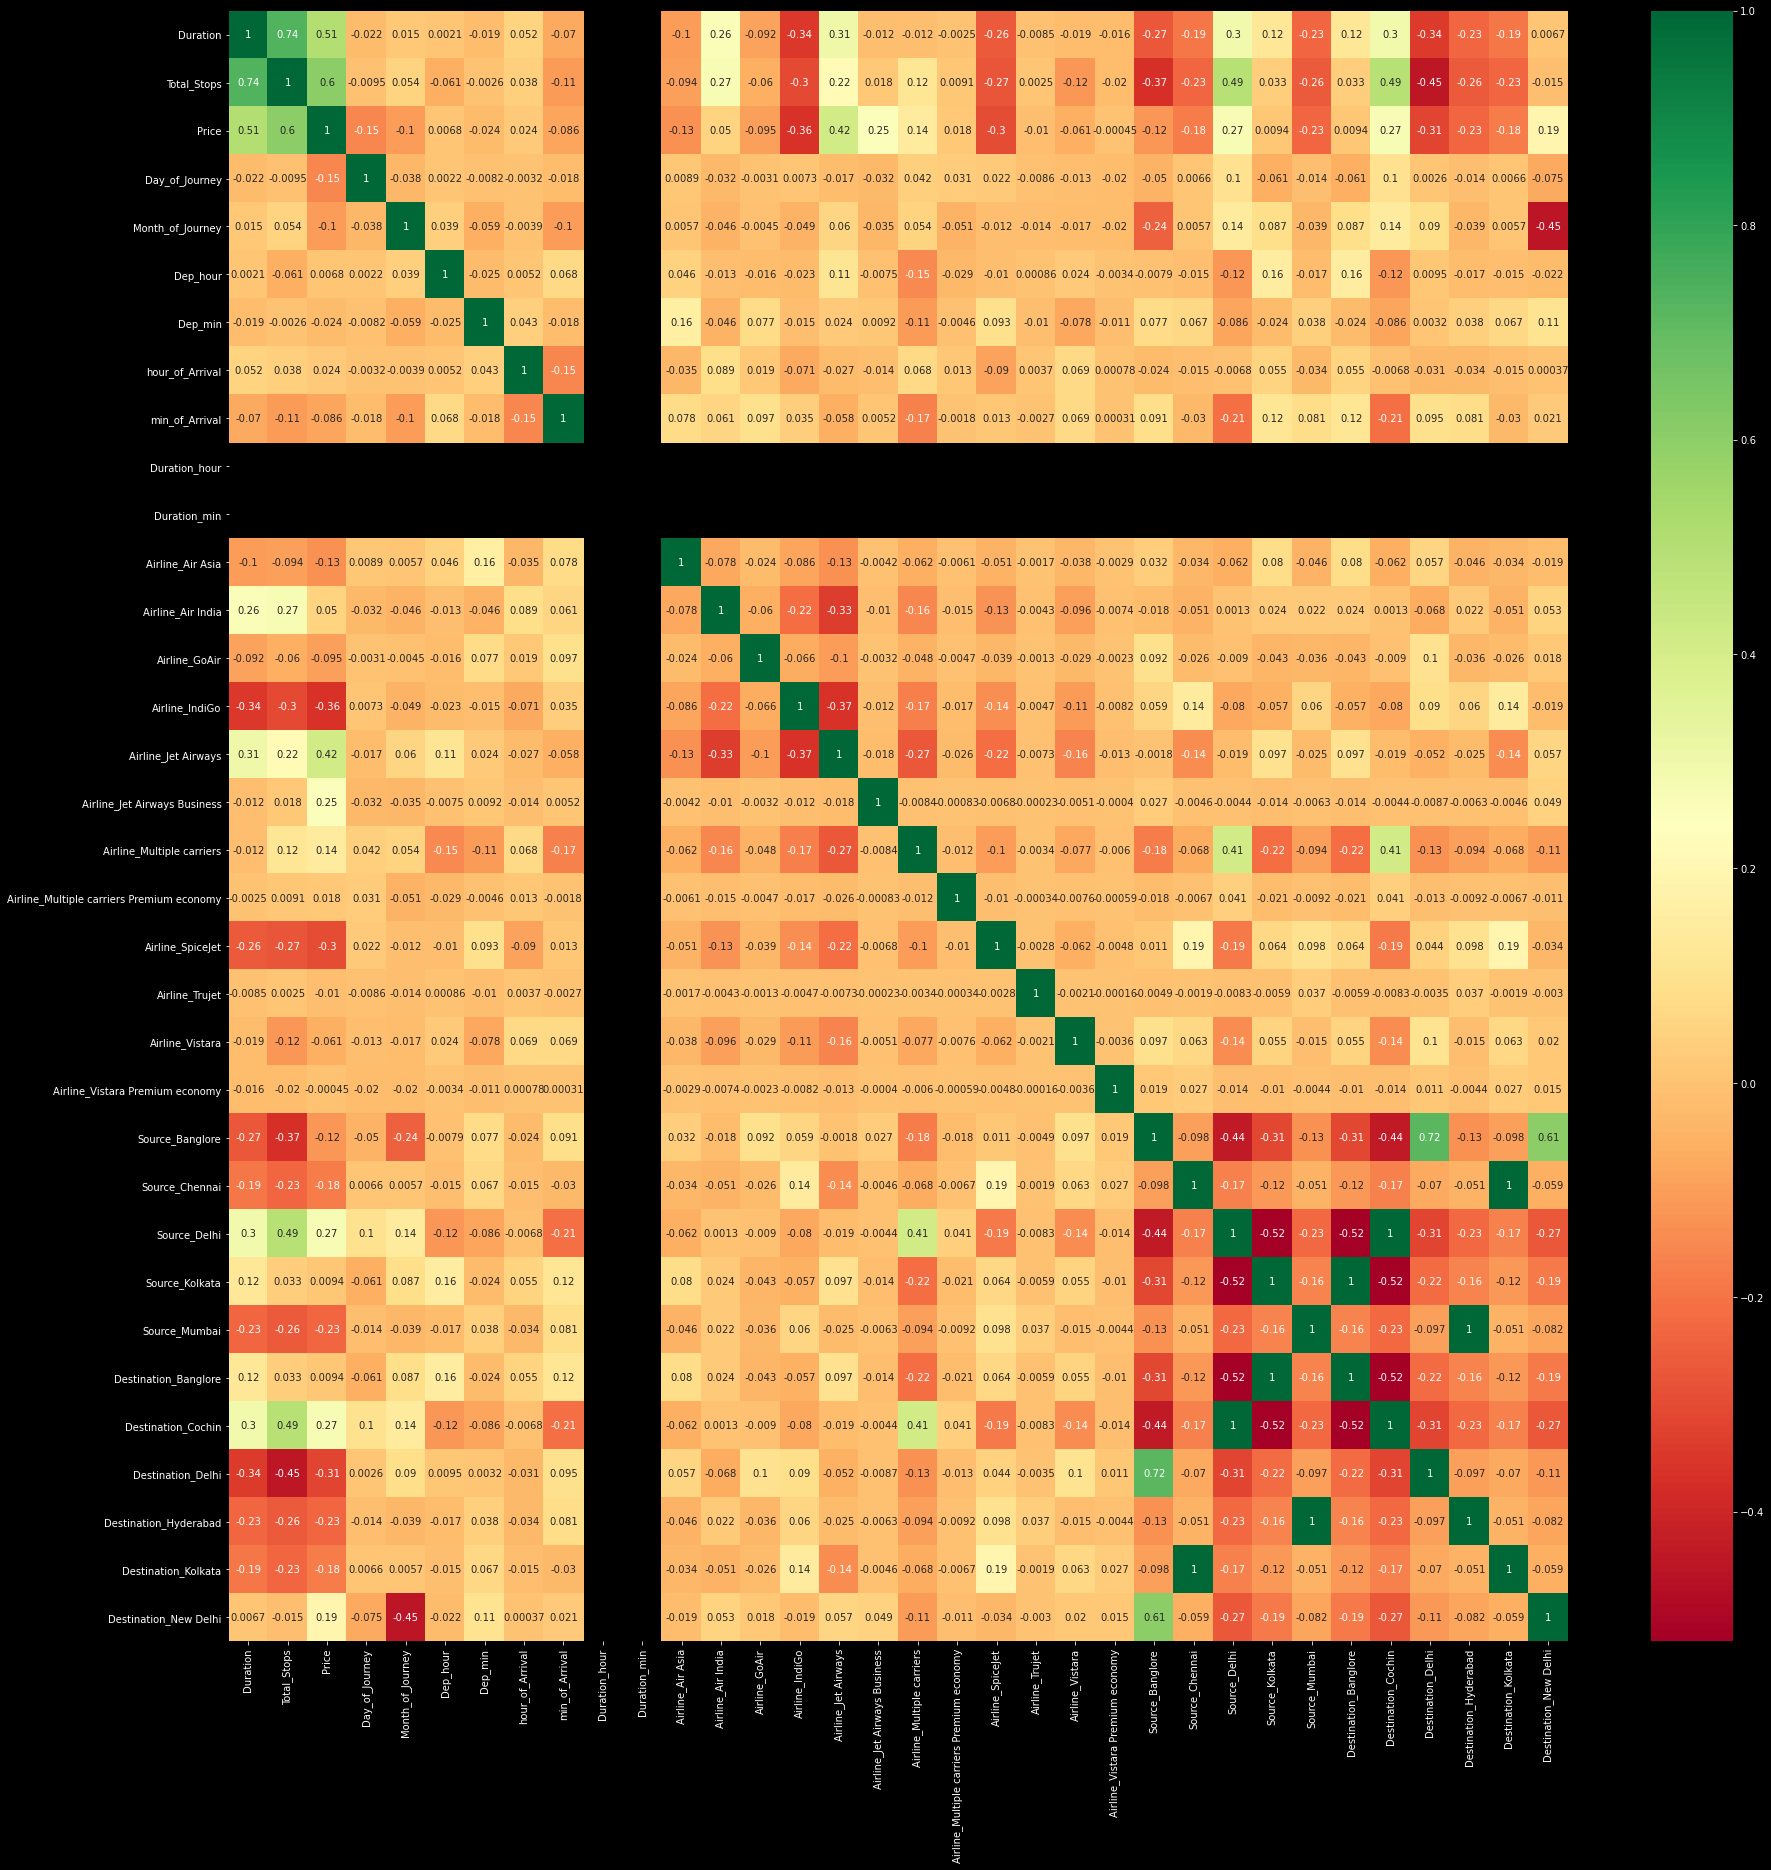

In [16]:
plt.style.use('dark_background')
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [17]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hour', 'Dep_min', 'hour_of_Arrival',
       'min_of_Arrival', 'Duration_hour', 'Duration_min', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [18]:
y_data = data['Price']
x_data = data[['Duration', 'Total_Stops', 'Day_of_Journey',
       'Month_of_Journey', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [19]:
x_data.shape

(10682, 27)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=42)

In [34]:
x_train

,Duration,Total_Stops,Day_of_Journey,Month_of_Journey,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
576,1490.0,2,1,6,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1454,450.0,1,15,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10157,1655.0,1,1,4,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1597,165.0,0,15,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4867,375.0,1,21,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1165.0,1,27,3,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
5191,400.0,1,9,5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
5390,760.0,1,15,5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
860,165.0,0,3,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
model.score(x_train,y_train)

0.9233052757351011

In [37]:
model.score(x_test,y_test)

0.7564041810548958

In [52]:
metrics.r2_score(y_test,model.predict(x_test))

0.7564041810548958

In [51]:
from sklearn import metrics

In [39]:
predictions = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, predictions)))

2410.102470880821


In [44]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
depth = [int(x) for x in np.linspace(5,30,12)]
min_sample_split = [5,10,20,40,80]
min_sample_leaf = [1,2,5,10]

In [45]:
grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf':min_sample_leaf
}

In [46]:
model_2 = RandomizedSearchCV(estimator=model,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=5)

In [47]:
model_2.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [5, 10, 20, 40,
                                                              80],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [53]:
metrics.r2_score(y_test,model_2.predict(x_test))

0.7830088918981388

In [55]:
import pickle

In [56]:
with open("./model.pickle",'wb') as f:
    pickle.dump(model_2,f)

In [57]:
with open("./model.pickle",'rb') as f:
    model_load = pickle.load(f)

In [58]:
print(model_load)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [5, 10, 20, 40,
                                                              80],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')
